In [279]:
#import libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [280]:
image=cv2.imread('Desktop/car-or-truck/train/Car/00002.jpeg')

In [281]:
image.shape

(128, 128, 3)

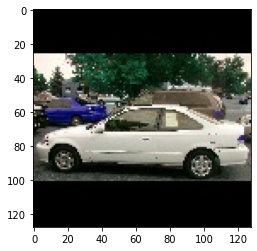

In [282]:
plt.imshow(image)

In [283]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

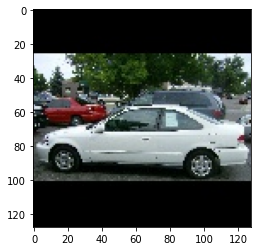

In [284]:
plt.imshow(image)

In [285]:
image0=cv2.imread('Desktop/car-or-truck/train/Truck/00001.jpeg')

In [286]:
image0.shape

(128, 128, 3)

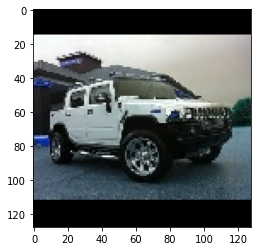

In [287]:
plt.imshow(image0)

In [288]:
image0=cv2.cvtColor(image0,cv2.COLOR_BGR2RGB)

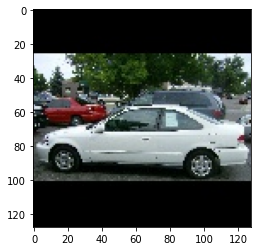

In [289]:
plt.imshow(image)

# ImageDataGenerator

In [290]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [291]:
Image_gen=ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2,rescale=1./255)

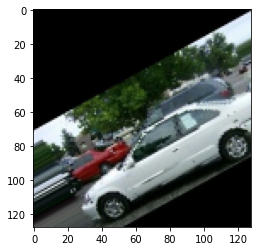

In [292]:
plt.imshow(Image_gen.random_transform(image))

# Now apply Imagedatagenerator to all folders

In [294]:
Image_gen.flow_from_directory('Desktop/car-or-truck/train')

Found 5117 images belonging to 2 classes.


In [295]:
Image_gen.flow_from_directory('Desktop/car-or-truck/valid')

Found 5051 images belonging to 2 classes.


# Create Model

In [296]:
from tensorflow.keras.models import Sequential 

In [297]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Activation,Flatten

In [298]:
model=Sequential()

In [299]:
shape=(150,150,3)

# Convolutional 2D

In [300]:
model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [301]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [302]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 72, 72, 128)       147584    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 36992)            

In [303]:
train_gen=Image_gen.flow_from_directory('Desktop/car-or-truck/train',target_size=(150,150),batch_size=32,class_mode='binary')

Found 5117 images belonging to 2 classes.


In [304]:
valid_gen=Image_gen.flow_from_directory('Desktop/car-or-truck/valid',target_size=(150,150),batch_size=32,class_mode='binary')

Found 5051 images belonging to 2 classes.


In [305]:
valid_gen.class_indices

{'Car': 0, 'Truck': 1}

# Trained on 5 epochs

In [306]:
result=model.fit(train_gen,epochs=5,steps_per_epoch=100,validation_data=valid_gen,validation_steps=12)

Epoch 1/5
100/100 [==============================] - 190s 2s/step - loss: 0.6843 - accuracy: 0.5797 - val_loss: 0.6501 - val_accuracy: 0.6146
Epoch 2/5
100/100 [==============================] - 196s 2s/step - loss: 0.6550 - accuracy: 0.6096 - val_loss: 0.6557 - val_accuracy: 0.6198
Epoch 3/5
100/100 [==============================] - 195s 2s/step - loss: 0.6335 - accuracy: 0.6412 - val_loss: 0.6480 - val_accuracy: 0.5911
Epoch 4/5
100/100 [==============================] - 205s 2s/step - loss: 0.6333 - accuracy: 0.6278 - val_loss: 0.5923 - val_accuracy: 0.6641
Epoch 5/5
100/100 [==============================] - 194s 2s/step - loss: 0.5867 - accuracy: 0.6941 - val_loss: 0.5820 - val_accuracy: 0.6823


In [307]:
type(result)

tensorflow.python.keras.callbacks.History

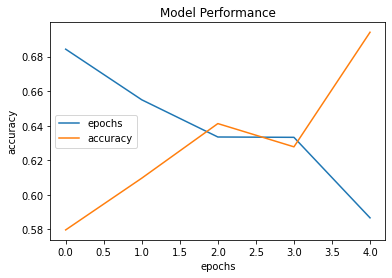

In [308]:
plt.plot(result.history['loss'])
plt.plot(result.history['accuracy'])
plt.title('Model Performance')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['epochs','accuracy'])
      

In [321]:
from tensorflow.keras.preprocessing import image 
import numpy as np

# Add tensor by expanding dimension

In [322]:
truck=image.load_img(('Desktop/car-or-truck/valid/Truck/05120.jpeg'),target_size=(150,150))
truck=image.img_to_array(truck)
truck.shape

(150, 150, 3)

In [323]:
truck=np.expand_dims(truck,axis=0)
truck.shape

(1, 150, 150, 3)

In [324]:
prediction=model.predict(truck)

In [325]:
print(f'Probability of that image is truck is:{prediction}')

Probability of that image is truck is:[[1.]]


In [326]:
class1=model.predict_classes(truck)
print(class1)

[[1]]


# Accurate Results 

In [328]:
model.save('Truck-and-Car.h5')

# Notebook By: Aimen Javed, https://github.com/AimenJaved